# 🎵 HarmonAIze — Model Building Notebook

This notebook builds modles for recommending sonGs on a curated subset of the **Spotify 1 Million Tracks** dataset.

We’ll perform:

1. Data visualization
2. Data cleaning (drop nulls, duplicates)
3. Feature selection (audio-based features only)
4. Normalization and encoding
5. Saving processed data

---


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [17]:
data = pd.read_csv("../../data/processed/spotify_features.csv")

X = data

Shape of X_train: (869811, 13)
Shape of X_test: (289937, 13)


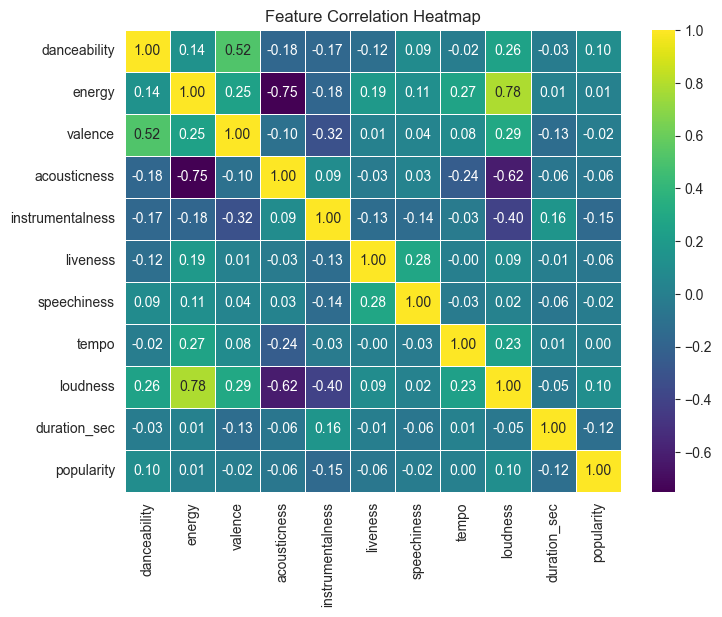

In [18]:
data_vis = X
data_vis = data_vis.drop("artist_name", axis=1)
data_vis = data_vis.drop("track_name", axis=1)
correlation_matrix = data_vis.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

The heatmap produced from the dataset shows that the following variables are highley correlative:
- energy and loudness
- danceability and valence

THe following features are inversely correlated:
- acousticness and loudness
- acousticness and energy

In [ ]:
RANDOM_STATE = 42
X_train, X_test = train_test_split(X, test_size=0.25, random_state = RANDOM_STATE)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)